In [1]:
#Script for validation set - Script 4
#*****************************
import numpy as np
import pandas as pd
import os
import pickle

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer    
)

In [2]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold
):
    """
    This is for computing different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold #if is more than threshold then print
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [3]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred) #actual values , predict values
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [4]:
def read_file_csv(filename):
    #read file
    df=pd.read_csv(os.path.join('../data/processed/',filename))
    df.drop(labels=['Unnamed: 0'],axis=1, inplace=True)
    
    return df

In [5]:
def read_features_csv(filename):
    #read file
    selected_features=pd.read_csv(os.path.join("../data/processed/",filename))
    selected_features.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
    features=selected_features['0'].tolist()
    
    return features

In [6]:
def eval_model():
    df=read_file_csv('booking_val.csv')
    features=read_features_csv('selected_features.csv')
    #read the trained model to use
    package = '../models/best_model.pkl'
    model = pickle.load(open(package, 'rb'))
    print('Model imported correctly')
    
    #Predicting the model over validation data set
    X_val = df.drop(['booking_status'], axis=1)
    y_val = df[['booking_status']]
    y_pred_val=model.predict(X_val[features])
    print('Data predicted on model')
    
    #Threshold selected
    optimal_threshold_curve=0.3
    
    #We generate diagnostic metrics
    confusion_matrix_statsmodels(model, X_val[features], y_val, threshold=optimal_threshold_curve)

    df_perf=model_performance_classification_statsmodels(model, X_val[features], y_val, threshold=optimal_threshold_curve)
    
    return df_perf

In [7]:
def main():
    df_perf=eval_model()
    print('\n',df_perf)
    print('The validation has ended')

Model imported correctly
Data predicted on model

    Accuracy    Recall  Precision        F1
0  0.774983  0.808097   0.620258  0.701826
The validation has ended


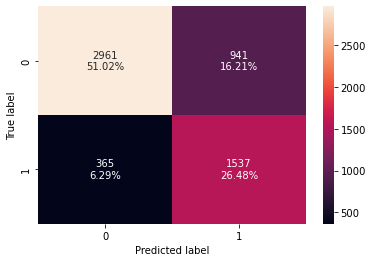

In [8]:
if __name__ == "__main__":    
    main()